# Pitch axis cascaded angle controller

In [1]:
% Load control module and define s as cont transfer function operator

pkg load control
s = tf('s');

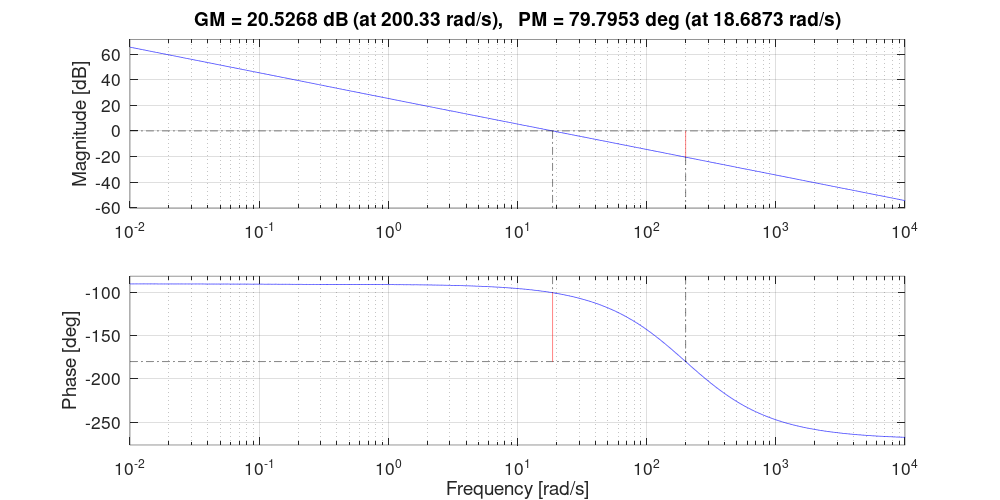

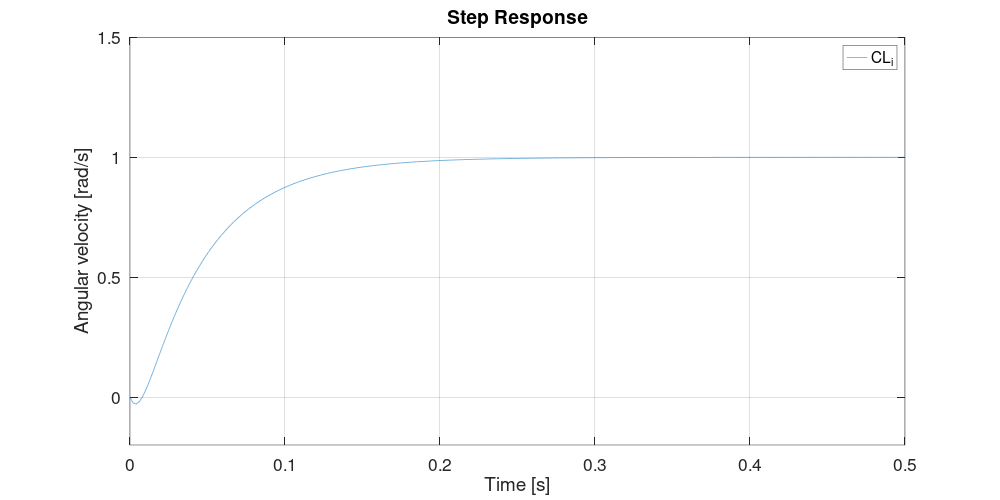

In [2]:
G_m = 4.437e-3/(50e-3*s+1); % Per-motor int to thrust transfer function

R = 85e-3;  % Distance between center of motor thrust vector
J = 0.0012; % Moment of inertia of drone around y-axis
B = 0.0004; % Dampening for drone on test stand

G_r = 2*R/(B+J*s); % Thrust to angular velocity transfer function

G_i = G_m*G_r*2; % Int to angular velocity transfer function
p = pole(G_i); % Get poles for inner plant

% PID controller
kp_i = 15; % Provides 20 dB of gain margin
ki_i = -p(2); % Not needed 
kd_i = -1/p(1); % cancels out pole in -20 due to motor model
D_i = kp_i*(1+kd_i*s+ki_i/s);

% Total time delay
delay = 10e-3;
T_d = (2-delay*s)/(2+delay*s);
direct_i = (T_d*G_i*D_i);

% Closed loop
CL_i = feedback(direct_i,1);

% Step response plot
figure('position',[0,0,1000,500])
step(CL_i,0.5)
ylim([-0.2 1.5])
ylabel("Angular velocity [rad/s]")
figure('position',[0,0,1000,500])
margin(T_d*G_i*D_i)

z_i = zero(direct_i);
p_i = pole(direct_i);

## Outer angle-control loop

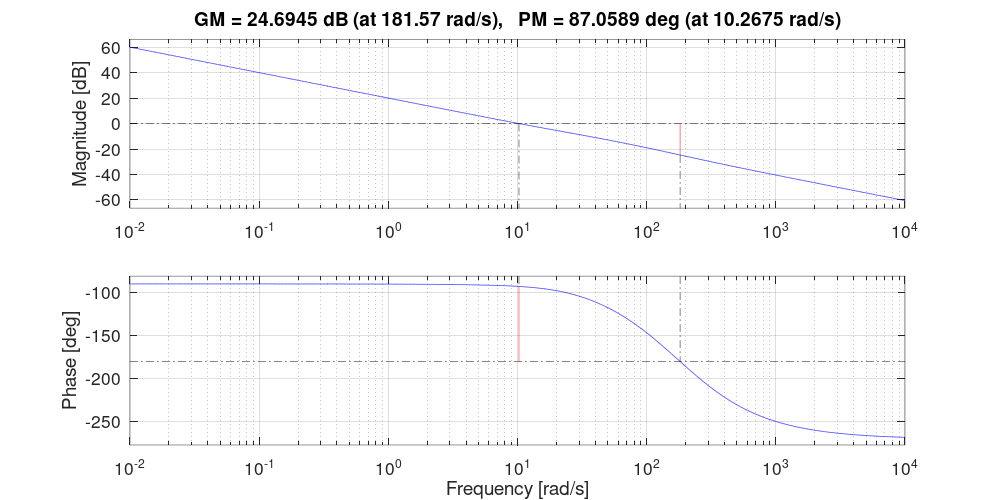

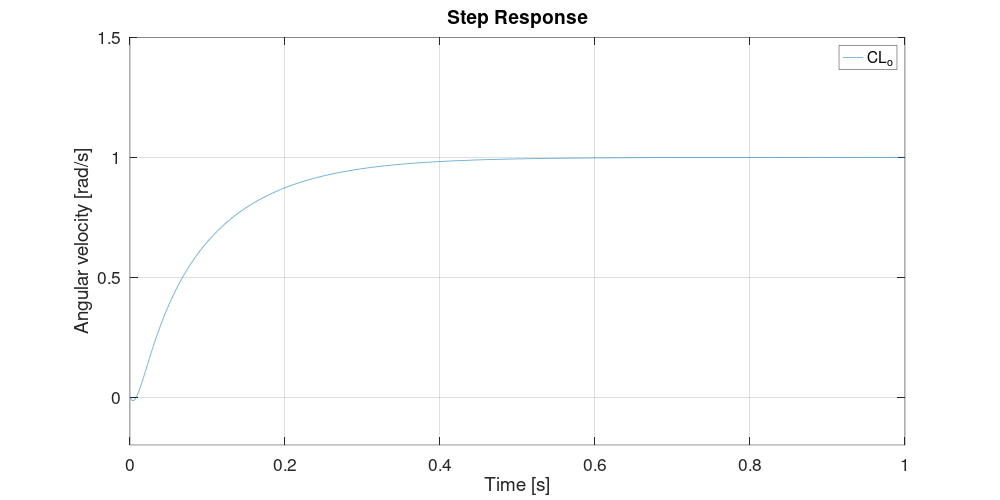

In [12]:
kp_o = 10; ki_o = 0; kd_o = 0.05;

% PID controller
D_o = kp_o*(1+kd_o*s+ki_o/s);
direct_o = (D_o*CL_i)/s;

% Closed loop
CL_o = feedback(direct_o,1);

z_o = zero(direct_o);
p_o = pole(direct_o);

% Step response plot
figure('position',[0,0,1000,500])
step(CL_o,1)
ylim([-0.2 1.5])
ylabel("Angular velocity [rad/s]")
figure('position',[0,0,1000,500])
margin(direct_o)



## Figuring out FFT

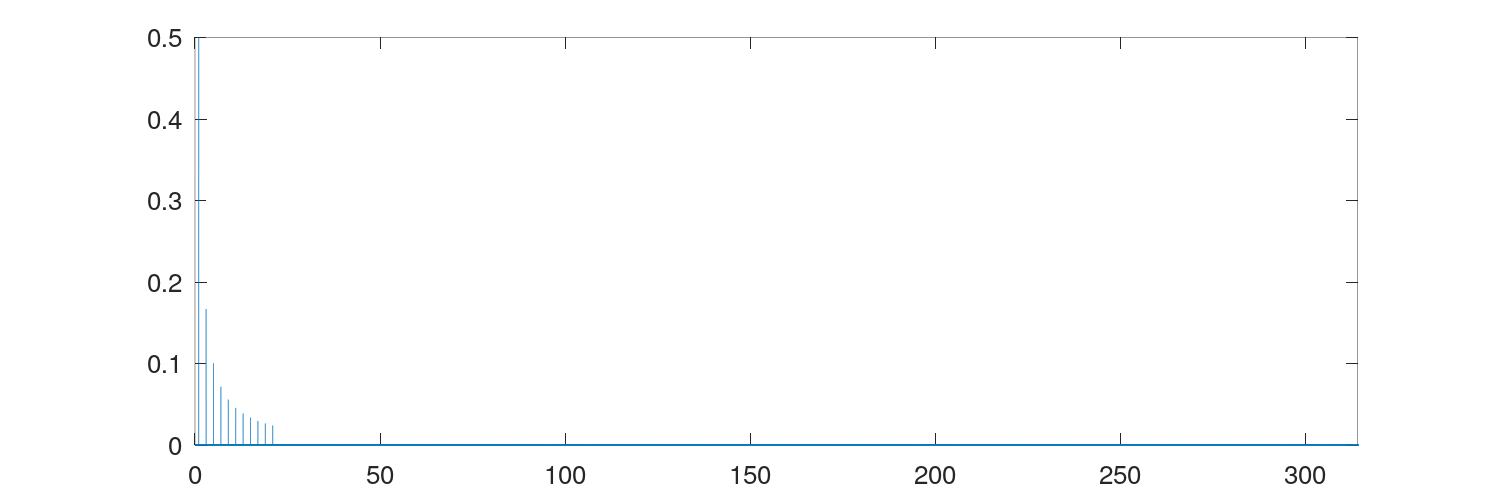

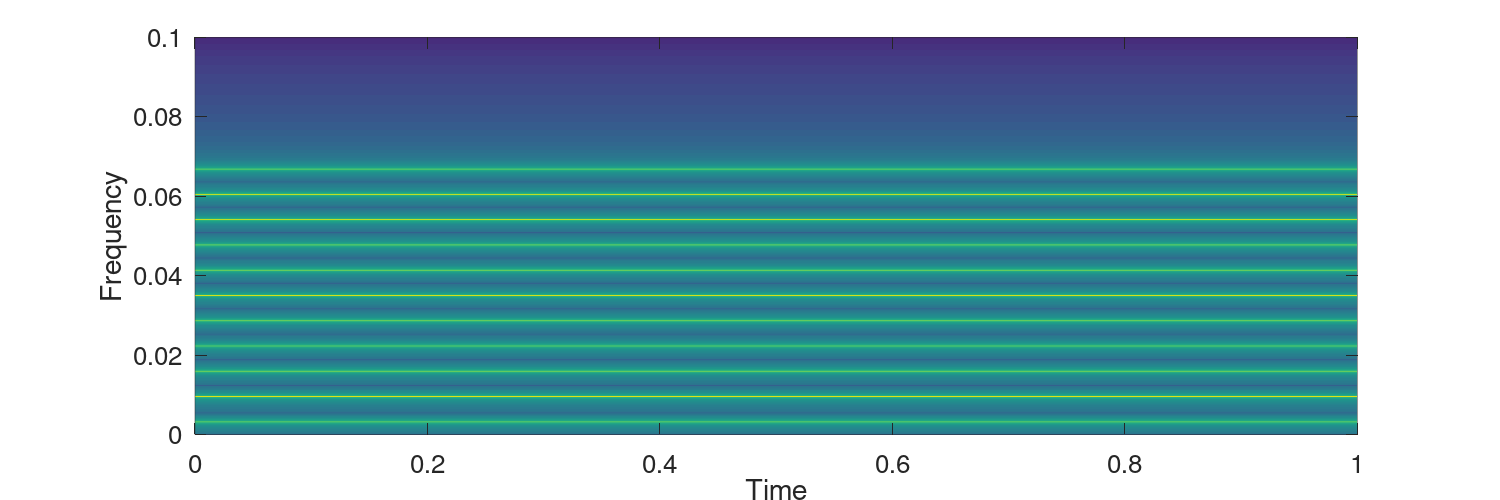

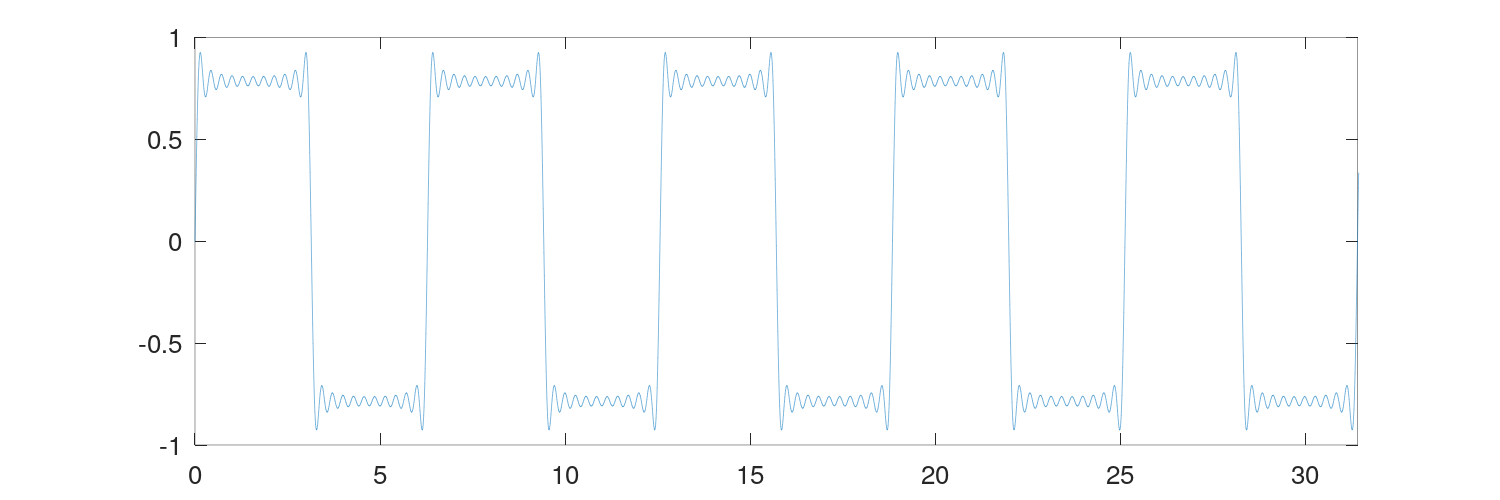

In [71]:
pkg load signal

X = 0:0.01:pi*200;

Y = sin(X);
for i = 1:10
    Y = Y + sin((i*2+1)*X)/(i*2+1);
end

figure(1)
plot(X,Y)
xlim([0 pi*10])

figure(2)
specgram(Y,length(X)-1);
ylim([0 0.1])

figure('position',[0,0,1500,500])
plot(X,abs(fft(Y)/length(X)));
xlim([0,pi*100])


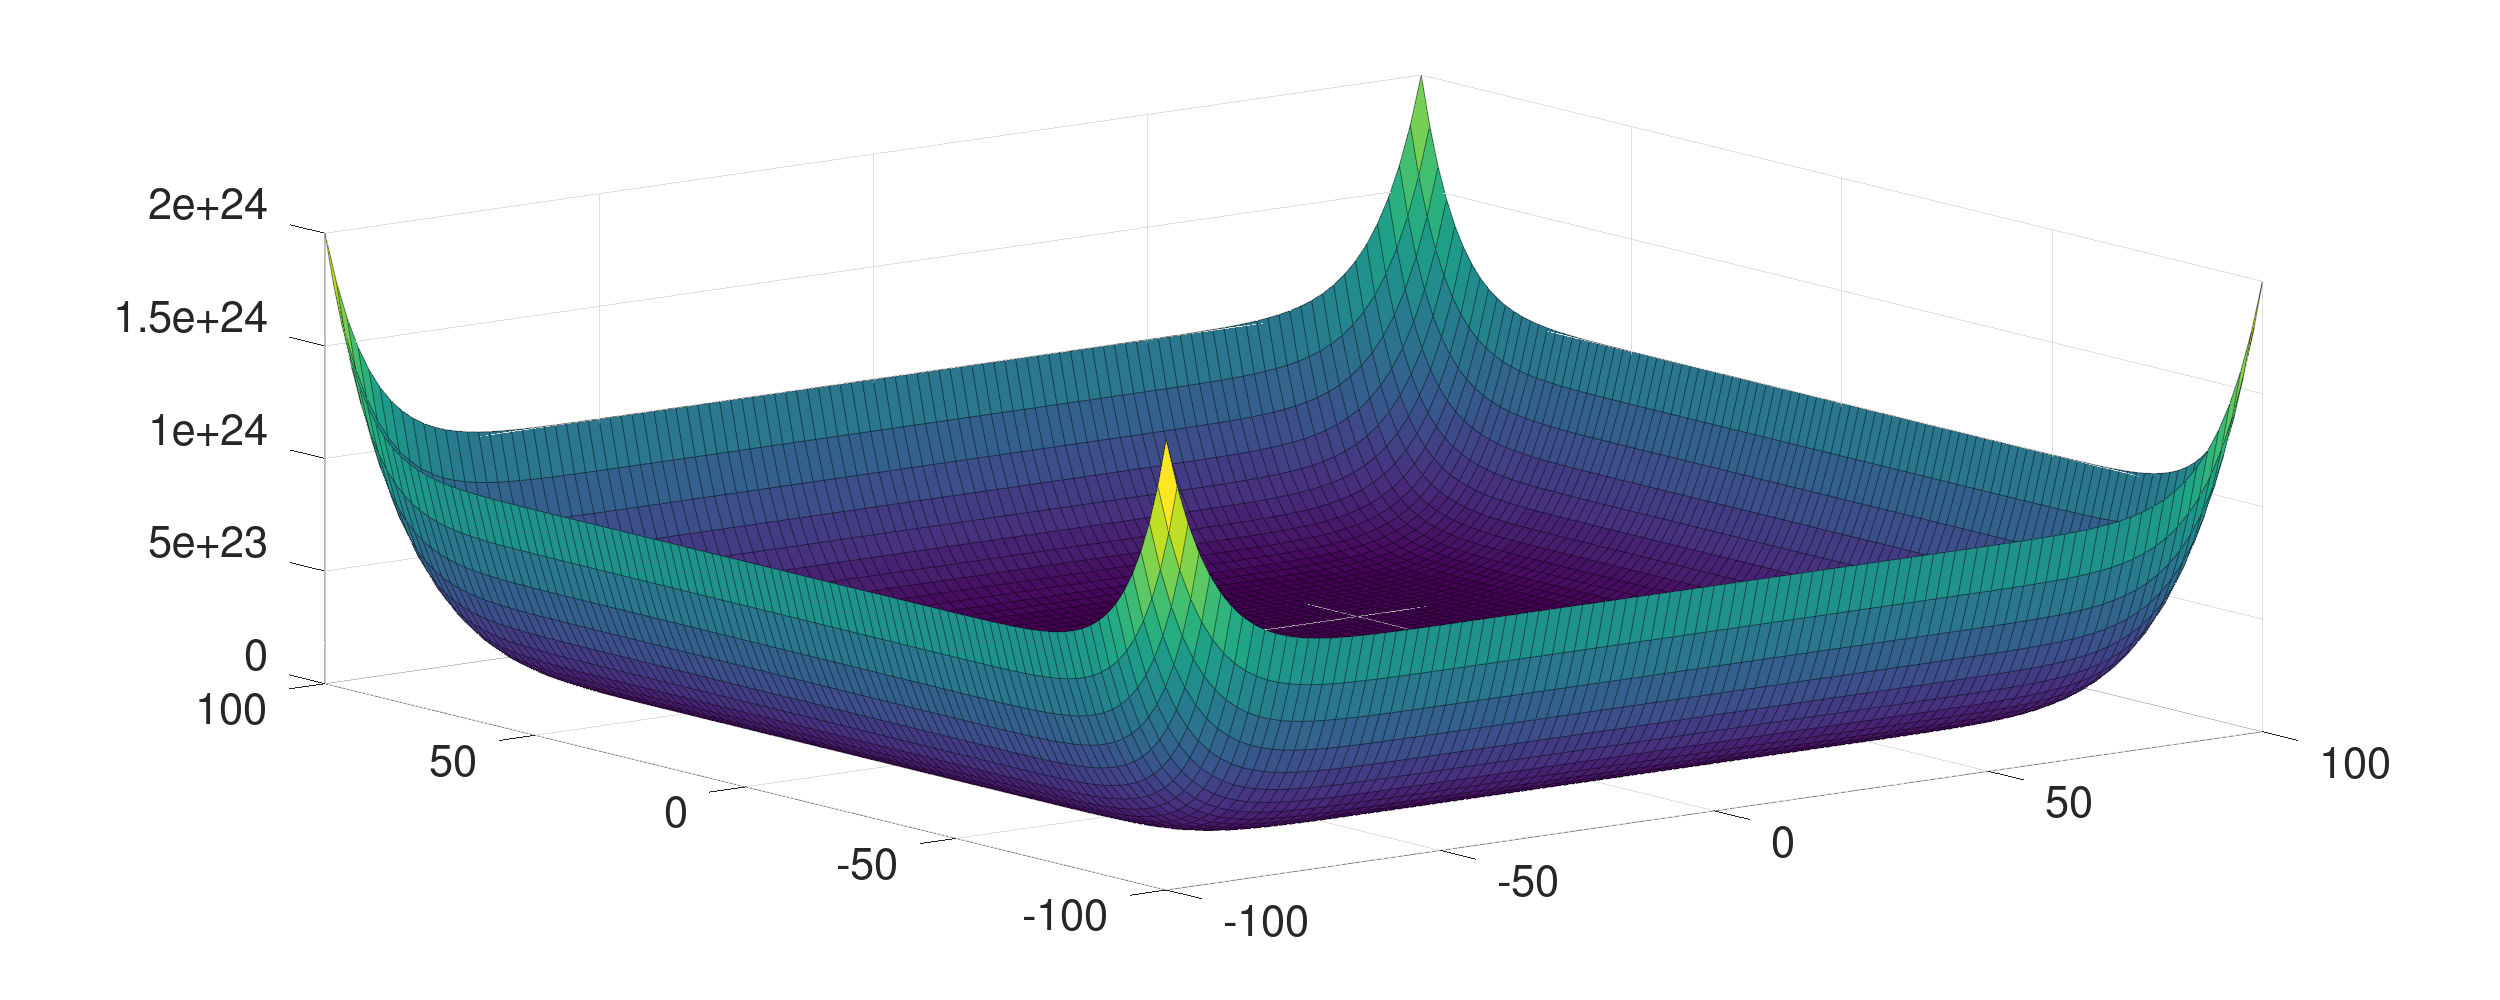

In [38]:
[x,y] = meshgrid(-100:2:100);
z = x.^12 + y.^12;
figure('position',[0,0,2500,1000])
surf(x,y,z);